In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.5)
import numpy as np

In [2]:
df_train = pd.read_table("training_data_facebook-cosmetics-brand.tab")
df_train.drop(df_train.index[0])
df_train.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime People who have liked your Page and engaged with your post,log_reach,log_fans_engaged,Selected
0,continuous,discrete,discrete,discrete,discrete,discrete,discrete,continuous,continuous,continuous,continuous,discrete
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,class
2,-1.38173231814,Photo,1,3,7,18,0.0,-0.594785577706,-0.844592991417,-2.48559017986,-1.86135461558,No
3,0.936228204126,Photo,2,12,1,3,0.0,-0.486633621688,-0.740037062531,-0.745765197241,-1.22987459659,No
4,-1.38173231814,Photo,1,3,6,10,0.0,4.79973890984,-0.220524790883,2.55319853647,0.105171475598,No


In [3]:
df_test = pd.read_table("test_data_facebook-cosmetics-brand.tab")
df_test.drop(df_test.index[0])
df_test.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime People who have liked your Page and engaged with your post,log_reach,log_fans_engaged,Selected
0,continuous,discrete,discrete,discrete,discrete,discrete,discrete,continuous,continuous,continuous,continuous,discrete
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,class
2,0.811908947836,Photo,1,10,7,6,0.0,-0.582196461132,-0.651817997535,-2.00459216631,-0.873387261092,No
3,0.938934808419,Status,2,12,5,11,0.0,0.248641214832,1.90980226015,0.942185563203,1.69759029023,No
4,-1.29684336531,Photo,1,3,3,10,0.0,-0.430554829678,-0.40676503921,-0.421817917035,-0.225779741854,No


In [4]:
df = pd.concat([df_train,df_test],axis=0)
print (len(df_train),len(df_test),len(df))
df.head()

402 102 504


,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime People who have liked your Page and engaged with your post,log_reach,log_fans_engaged,Selected
0,continuous,discrete,discrete,discrete,discrete,discrete,discrete,continuous,continuous,continuous,continuous,discrete
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,class
2,-1.38173231814,Photo,1,3,7,18,0.0,-0.594785577706,-0.844592991417,-2.48559017986,-1.86135461558,No
3,0.936228204126,Photo,2,12,1,3,0.0,-0.486633621688,-0.740037062531,-0.745765197241,-1.22987459659,No
4,-1.38173231814,Photo,1,3,6,10,0.0,4.79973890984,-0.220524790883,2.55319853647,0.105171475598,No


In [5]:
# clean up and get only necessary columns
# Remove missing values
data = df[['Post Hour','Post Month','Paid','log_reach','log_fans_engaged','Type']].dropna()
# first row describes the data as discrete or continuous. We don't need that.
data=data.drop(data.index[0])
# Convert from object to float
data[['log_reach','log_fans_engaged']] = data[['log_reach','log_fans_engaged']].astype(float)
data[['Post Hour','Post Month']] = data[['Post Hour','Post Month']].astype(int)
data['Paid'] = data['Paid'].astype(float).astype(int)
data['Type'] = data['Type'].astype('category')

data.dtypes

Post Hour              int64
Post Month             int64
Paid                   int64
log_reach            float64
log_fans_engaged     float64
Type                category
dtype: object

In [6]:
data.head()

,Post Hour,Post Month,Paid,log_reach,log_fans_engaged,Type
2,18,3,0,-2.485590,-1.861355,Photo
3,3,12,0,-0.745765,-1.229875,Photo
4,10,3,0,2.553199,0.105171,Photo
5,4,4,0,1.431902,-0.769411,Link
6,3,11,0,-0.670912,-0.553921,Photo


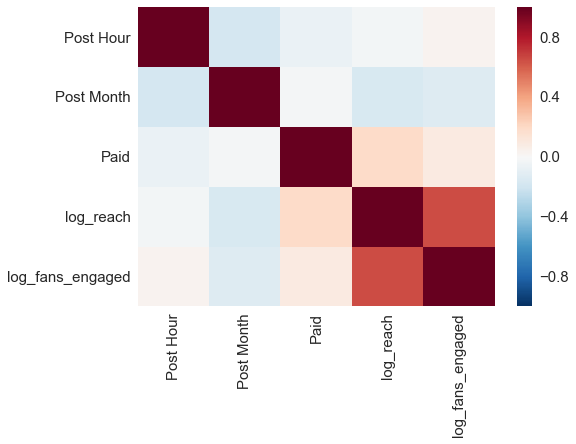

In [7]:
sns.heatmap(data.corr())

(array([  18.,  116.,  237.,   94.,   35.]),
 array([-2.92056457, -1.75853945, -0.59651433,  0.5655108 ,  1.72753592,
         2.88956104]),
 <a list of 5 Patch objects>)

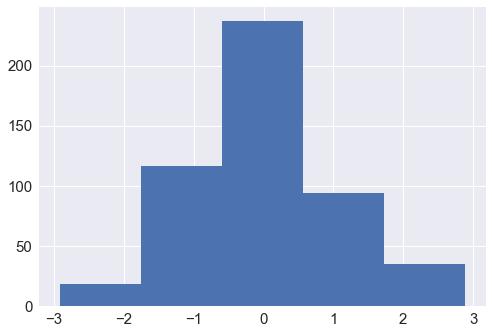

In [8]:
data['combined'] = data['log_reach'] + data['log_fans_engaged']

plt.hist(data['log_reach'],5)

(array([   5.,   15.,  182.,  242.,   56.]),
 array([-4.67764982, -3.18551449, -1.69337916, -0.20124382,  1.29089151,
         2.78302684]),
 <a list of 5 Patch objects>)

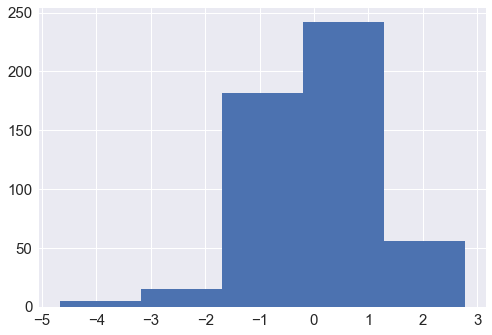

In [9]:
plt.hist(data['log_fans_engaged'],5)

In [10]:
p = data.pivot_table(index='Post Hour',columns='Post Month',values='log_reach',aggfunc=np.mean)

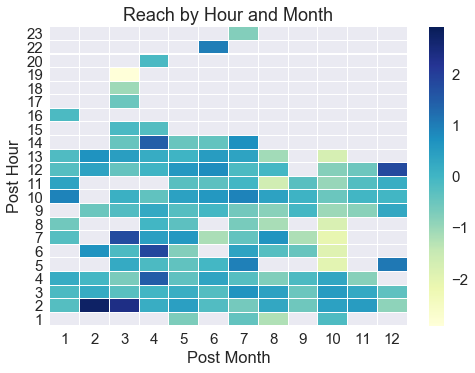

In [11]:
ax = sns.heatmap(p, linewidths=.01, cmap="YlGnBu")
ax.invert_yaxis()
ax.set_title('Reach by Hour and Month')

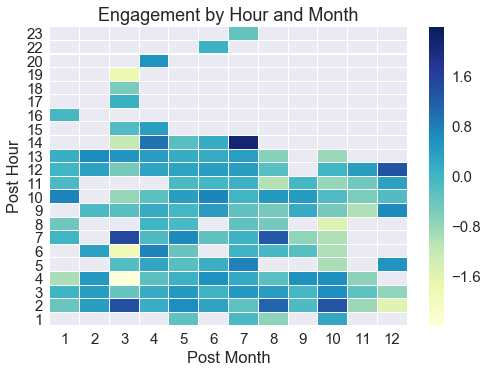

In [12]:
p = data.pivot_table(index='Post Hour',columns='Post Month',values='log_fans_engaged',aggfunc=np.mean)
ax = sns.heatmap(p, linewidths=.01, cmap="YlGnBu")
ax.invert_yaxis()
ax.set_title('Engagement by Hour and Month')

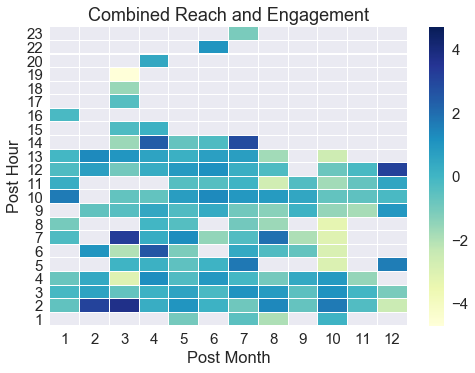

In [13]:
p = data.pivot_table(index='Post Hour',columns='Post Month',values='combined',aggfunc=np.mean)
ax = sns.heatmap(p, linewidths=.01, cmap="YlGnBu")
ax.invert_yaxis()
ax.set_title('Combined Reach and Engagement')

In [14]:
cat_labels = ['Poor','Fair','Good','Very Good','Great']
reach_bins = [-2.92056457, -1.81866201, -0.71675945,  0.38514311,  1.48704567,
         2.58894823]
reach_groups = pd.cut(data['log_reach'],reach_bins,labels=cat_labels)
data['reach_groups'] = reach_groups


In [15]:
engage_bins = [-4.67764982, -3.18551449, -1.69337916, -0.20124382,  1.29089151,
         2.78302684]
engage_groups = pd.cut(data['log_fans_engaged'],engage_bins,labels=cat_labels)
data['engage_groups'] = engage_groups


In [16]:
data.head()

,Post Hour,Post Month,Paid,log_reach,log_fans_engaged,Type,combined,reach_groups,engage_groups
2,18,3,0,-2.485590,-1.861355,Photo,-4.346945,Poor,Fair
3,3,12,0,-0.745765,-1.229875,Photo,-1.975640,Fair,Good
4,10,3,0,2.553199,0.105171,Photo,2.658370,Great,Very Good
5,4,4,0,1.431902,-0.769411,Link,0.662491,Very Good,Good
6,3,11,0,-0.670912,-0.553921,Photo,-1.224833,Good,Good


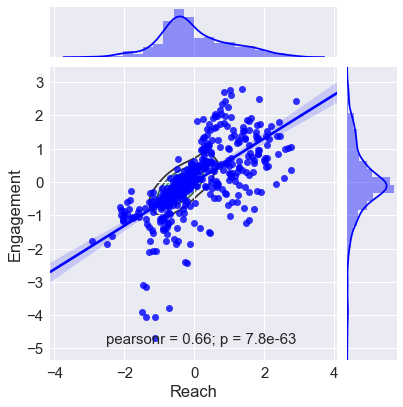

In [17]:
ax = sns.jointplot(data=data,x='log_reach',y='log_fans_engaged',
              color='b',kind='reg').plot_joint(sns.kdeplot,zorder=0,n_levels=5,color='r')
plt.xlabel('Reach')
plt.ylabel('Engagement')

In [18]:
data.head()

,Post Hour,Post Month,Paid,log_reach,log_fans_engaged,Type,combined,reach_groups,engage_groups
2,18,3,0,-2.485590,-1.861355,Photo,-4.346945,Poor,Fair
3,3,12,0,-0.745765,-1.229875,Photo,-1.975640,Fair,Good
4,10,3,0,2.553199,0.105171,Photo,2.658370,Great,Very Good
5,4,4,0,1.431902,-0.769411,Link,0.662491,Very Good,Good
6,3,11,0,-0.670912,-0.553921,Photo,-1.224833,Good,Good


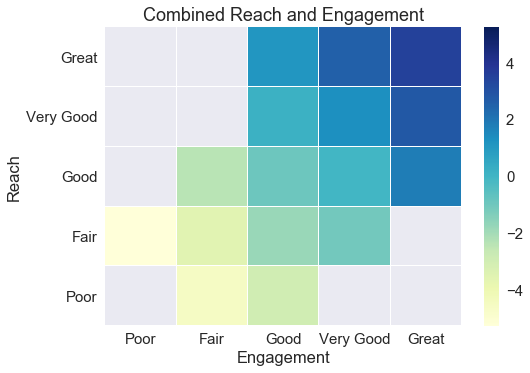

In [19]:
p = data.pivot_table(index='reach_groups',columns='engage_groups',values='combined',aggfunc=np.mean)
ax = sns.heatmap(p, linewidths=.01, cmap="YlGnBu")
ax.invert_yaxis()
ax.set_title('Combined Reach and Engagement')
plt.ylabel('Reach')
plt.xlabel('Engagement')

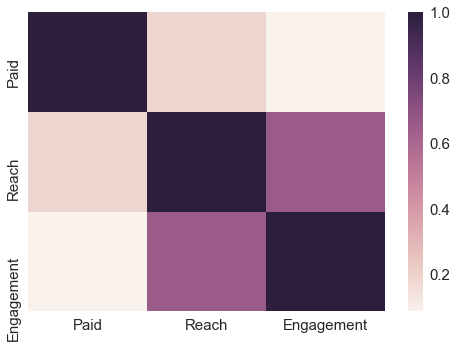

In [23]:
sns.heatmap(data[['Paid','log_reach','log_fans_engaged']].corr(),xticklabels=['Paid','Reach','Engagement'],
            yticklabels=['Paid','Reach','Engagement'])

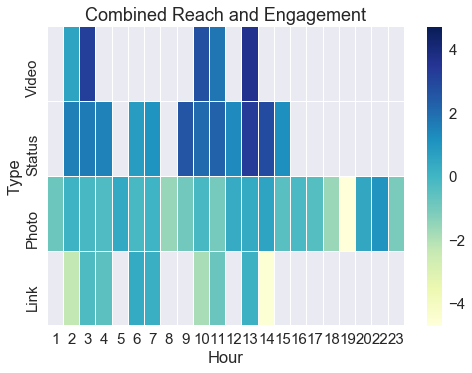

In [21]:
p = data.pivot_table(index='Type',columns='Post Hour',values='combined',aggfunc=np.mean)
ax = sns.heatmap(p, linewidths=.01, cmap="YlGnBu")
ax.invert_yaxis()
ax.set_title('Combined Reach and Engagement')
plt.ylabel('Type')
plt.xlabel('Hour')